# Least Squares Minimization Method

The least-squares "method" fits a curve to an aggregate (or cloud) of data.  It is used when working with measured data where data scatter is an important consideration.  Like interpolation, its utility in engineering is in making predictions of responses at as of yet unobserved instances.  Unlike the results can be (and are) used for extrapolation beyond the range of observations.

:::{note}
Least squares is really just a metric of fit, there are others.  If the residuals (errors) happen to be normally distributed, then some useful statistical interpretations are available.  Actual computations are accomplished using some version of 
- normal equations (based on means and variances)
- linear algebra (based on a design matrix)

In practice packages are employed to simplify the exercise, generally some type of regression package such as

- `statsmodel`
- `sklearn`

is employed as are a few others common in the python world.  The homebrew work herein is strictly pedagogical and you should employ packages after you have a good feel for whats going on under the hood (of a package)
:::

## Background

Consider {numref}`leastsquares-10-1`.  The sketch has four points and a curve passing through the data cloud (admittedly not much of a cloud with only 4 points!) The points are labeled as $P_1=(x_1,y_1)$, $P_2=(x_2,y_2)$, $P_3=(x_3,y_3)$, and $P_4=(x_4,y_4)$ the equation of the curve that is passed through the points is $y=f(x)$.

```{figure} leastsquares-10-1.png
---
width: 400px

name: leastsquares-10-1
---
A curve passing through four dater points

```

For each point $P_i=(x_i,y_i)$ we can define an *error*, $e_i$ as the difference between $y_i$ and $f(x_i)$ as 

$$e_i=y_i-f(x_i)$$

for each of the data points.  In {numref}`leastsquares-10-1` the $e_2$ is the difference between $y_2$ and $f(x_2)$.  The curve $y=f(x)$ is actually some specific equation; for instance if we are fitting a line the curve is 

$$f(x)=\beta_0 + \beta_1 \cdot x$$ 


and the goal is to find values of $\beta_0$ and $\beta_1$ that produce a good curve fit.  

:::{admonition} Fitting Strategy
:class: tip

The overall strategy in fitting a data model (curve) to a set of data points is to find an appropriate set of values for the coefficients in the specific data model.  For instance in the linear model above the goal is to find $\beta_0$ and $\beta_1$

:::

We would like to choose the unknown coefficients in a manner that makes the errors, $e_i$, as small in magnitude as possible (i.e. zero!).  One approach could be to select coefficients so the sum of the errors is minimized, however large positive errors could cancel large negative errors, and while the metric would get small the fit would be poor.

An obvious choice to mitigate this problem are to minimize the sum of squared errors.  The squared error will always be nonnegative regardless of whether the individual error is positive or negative; thus one is always summing positive numbers eliminating the possibility that large errors might cancel each other because of opposite signs.

### Linear Least Squares

The linear data model produces the following error structure

$$e_i=y_i-(\beta_0 + \beta_1 \cdot x_i)$$

If we let $z$ represent the sum of squared errors we have

$$z=[y_1-(\beta_0 + \beta_1 \cdot x_1)]^2 + [y_2-(\beta_0 + \beta_1 \cdot x_2)]^2 + \dots + [y_n-(\beta_0 + \beta_1 \cdot x_n)]^2$$

or 

$$z = \sum_{i=1}^n[y_i-(\beta_0 + \beta_1 \cdot x_i)]^2$$

Our goal is to minimize $z$ by choice of $\beta_0$ and $\beta_1$.  Recall from calculus that the necessary and sufficient condition for a minimum is that the partial derivatives of $z$ with respect to $\beta_0$ and $\beta_1$ must vanish. 

We can stipulate these conditions as

$$\frac{\partial z}{\partial \beta_0} = -2\sum_{i=1}^n[y_i-(\beta_0 + \beta_1 \cdot x_i)]^2 =0 $$

and

$$\frac{\partial z}{\partial \beta_1} = -2\sum_{i=1}^n x_i [y_i-(\beta_0 + \beta_1 \cdot x_i)]^2 =0 $$

Performing a little algebra we can arrive at

$$ \beta_1 \sum_{i=1}^n x_i + n \beta_0 = \sum_{i=1}^n y_i  $$

and

$$\beta_1 \sum_{i=1}^n x_i^2 + \beta_0 \sum_{i=1}^n x_i = \sum_{i=1}^n x_i y_i  $$

Now we have two equations in two unknowns which can be solved as

$$ \beta_1 = \frac{\sum_{i=1}^n x_i \sum_{i=1}^n y_i -n \sum_{i=1}^n x_i y_i  }{(\sum_{i=1}^n x_i)^2 -n \sum_{i=1}^n x_i^2} $$

$$ \beta_0 = \frac{1}{n}\sum_{i=1}^n y_i - \beta_1 \frac{1}{n} \sum_{i=1}^n x_i$$

:::{note}
These two equations are also known as the normal equations - and will result if we apply Maximum Likelihood Estimation to the error function assuming the error distribution is normal with zero mean and finite variance.
:::

### Example 10-1

An engineer measured the force exherted by a spring as a function of its displacement from an equilibrium distance.  Here are the data.

|ObservationID|Distance(cm)|Force(N)|
|:---|---:|---:|
|1|2|2.0|
|2|4|3.5|
|3|11|8.0|
|4|7|4.5|
|5|17|9.5|

Determine the "best fit" straight line that passes through the aggregate of the data using least-squares method, plot the data and the resulting line.  Estimate the force corresponding to a displacement of 8.5 cm.


#### Create the Data:
Create the data - in this instance the problem is small enough to simply create two lists


In [1]:
# data
distance = [2,4,11,7,17]
force = [2.0,3.5,8.0,4.5,9.5]

#### Code the Formulas

Now to use the normal equations we will use equivalent names $x$ and $y$ so we can employ the equations as written.

:::{admonition} Aside
:class: tip
Here we are employing the principle of algebraic substitution, a type of abstraction.  One does not need to do this and could simply operate on the original names, but many people find that confusing.
:::

In [2]:
# equivalent names
y = force
x = distance
x2 = [] # empty list 
xy = [] # empty list
n = len(x)
# components of the fitting model
for irow in range(n):
    x2.append(x[irow]**2)
    xy.append(x[irow]*y[irow])
beta1 = (sum(x)*sum(y) - n*sum(xy))/(sum(x)**2 - n*sum(x2))
beta0 = (sum(y)/n) - beta1*(sum(x)/n)

#### Prepare the PLot

Now we have evaluated the equations as written and recovered $\beta_0$ and $\beta_1$.  So now lets set up the plotting.

1. We will need the plotting package
2. We will need to use the equation we just found to make the data model line - you will see we automate it a little bit below.

In [3]:
# import the package
from matplotlib import pyplot as plt

# make a list for plotting
xmodel = [0.8*min(x),1.1*max(x)] # a little beyond the range of the data
ymodel = []
for i in range(len(xmodel)):
    ymodel.append(xmodel[i]*beta1+beta0) #make a model to plot

#### Render the Plot

Now we can render the plot - notice we put the equation into the title line and have a LaTex-like string in the `ylabel` line.

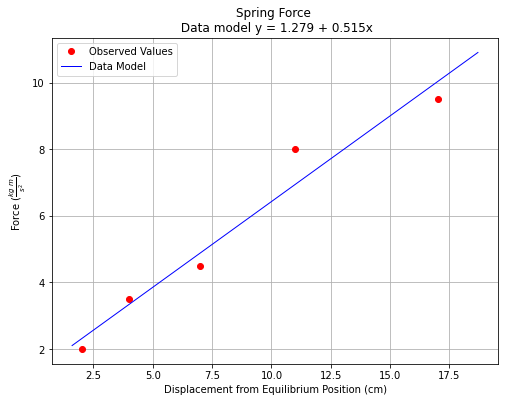

In [4]:
titleline = "Spring Force \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
# Create a line chart of displacement on x axis and force on y axis
mydata = plt.figure(figsize = (8,6)) # build a square drawing canvass from figure class
plt.plot(x, y, c='red', marker='o',linewidth=0) # basic line plot
plt.plot(xmodel,ymodel,c='blue',linewidth=1)
plt.xlabel('Displacement from Equilibrium Position (cm)')
plt.ylabel('Force '+r'($\frac{kg~m}{s^2}$)')
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)
plt.grid()
plt.show()

#### Apply the Data Model

Now the last part of the problem; estimate force at $x=8.5~cm$.  Looking at the data model, it looks like a value between 5.5 and 6 Newtons, but we can do better because we have a model:

In [5]:
yestimate = (8.5)*beta1+beta0
print("Estimated force at displacement x= ",8.5,"cm is ",round(yestimate,2),' Newtons')

Estimated force at displacement x=  8.5 cm is  5.65  Newtons


### Assessing the Fit

Once we have fit a line, we should evaluate the error structure.  

#### Sum of Squared Errors

One important measure is the sum of squared errors (SSE);

$$SSE = \sum_{i=1}^n [y_i-f(x_i)]^2$$

:::{note}
We intentionally switched back to $f(x)$ instead or retaining the equation of a line, any model will produce an error structure, so we are not limited to just linear models.
:::

The SSE is an indication of the quality of the fit a smaller number is better, and SSE is useful when comparing several different data models (different $f(x)$'s) of the same data set.  The curve producing the smallest SSE is usually the desired data model from the collection.

####  Coefficient of Determination (R$^2$)

Another indicator of fit quality is the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) usually symbolized as $R^2$.  Its formula is

$$ R^2 = 1- \frac{SSE}{SST} = 1 - \frac{\sum_{i=1}^n [y_i-f(x_i)]^2}{\sum_{i=1}^n [y_i-\bar y]^2} $$

The coefficient will approach 1 when the SSE gets close to zero usually indicating a useable fit (but you should plot to be sure).

### Example 10-2

Continue the example above and assess the fit quality using SSE and $R^2$

#### Build the Statistics

Simply create empty lists, compute the summands, then sum up the lists

In [6]:
se = [] #empty list for squared errors
st = [] #empty list for squared deviations of y from its mean
for irow in range(n):
    se.append((y[irow]-beta0-beta1*x[irow])**2) # build the sq. err
    st.append((y[irow]-(sum(y)/n))**2) # inefficient computation here! but faithful to the equation
sse = sum(se) # we will add this to the title shortly
sst = sum(st) # we will add this to the title shortly

Now we have the values, simple enough to just add to the plot.

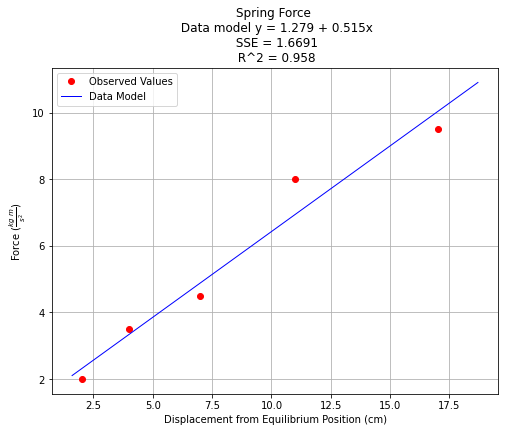

In [7]:
titleline = "Spring Force \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(1.-sse/sst,3)) 
# Create a line chart of displacement on x axis and force on y axis
mydata = plt.figure(figsize = (8,6)) # build a square drawing canvass from figure class
plt.plot(x, y, c='red', marker='o',linewidth=0) # basic line plot
plt.plot(xmodel,ymodel,c='blue',linewidth=1)
plt.xlabel('Displacement from Equilibrium Position (cm)')
plt.ylabel('Force '+r'($\frac{kg~m}{s^2}$)')
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)
plt.grid()
plt.show()

The $R^2$ value is close to 1 suggesting a good fit, hence for these data we would be comfortable choosing the line as our data model.